K-Mean Clustring

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv(r'C:\Users\SMART TECH\Desktop\ML\AML_Ass01\AML_Ass01\K-Mean\kmeans_dataset.csv')

print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)
df.drop(columns=['Customer_ID'], inplace=True)
df.drop(columns=['Age'], inplace=True)
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min()) / (df[numerical_cols].max() - df[numerical_cols].min())

print(df.head())


Customer_ID                      0
Age                             29
Annual_Income                   26
Spending_Score                  23
Website_Visits                  25
Product_Categories_Purchased    27
Total_Purchase_Amount           34
Average_Session_Duration        29
Return_Rate                     31
Discount_Usage                  19
dtype: int64
   Annual_Income  Spending_Score  Website_Visits  \
0       1.000000        0.252525        0.068966   
1       0.242197        0.616162        0.896552   
2       0.440923        0.030303        0.206897   
3       0.257247        0.888889        0.448276   
4       0.391912        0.414141        0.655172   

   Product_Categories_Purchased  Total_Purchase_Amount  \
0                      0.666667               1.000000   
1                      0.888889               0.266536   
2                      0.490251               0.065079   
3                      1.000000               0.063263   
4                      0.222222   

Elbow Method

In [36]:
k_value = int(input("Enter the K value till check Elbow"))

In [39]:
# Function to compute Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


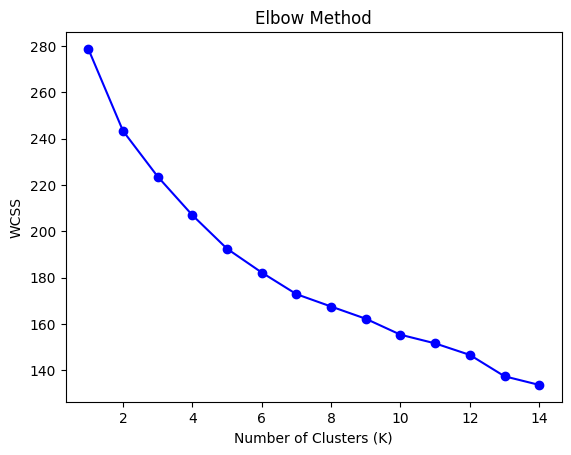

In [40]:
def kmeans(X, k, max_iters=100):
    # np.random.seed(42) 
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])       
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        
    return labels, centroids

X = df[numerical_cols].values
wcss = []
for k in range(1, k_value): 
    labels, centroids = kmeans(X, k)
    wcss.append(np.sum((X - centroids[labels])**2))

# Plot Elbow Method
plt.plot(range(1, len(wcss) + 1), wcss, marker='o',linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Silhouette_score

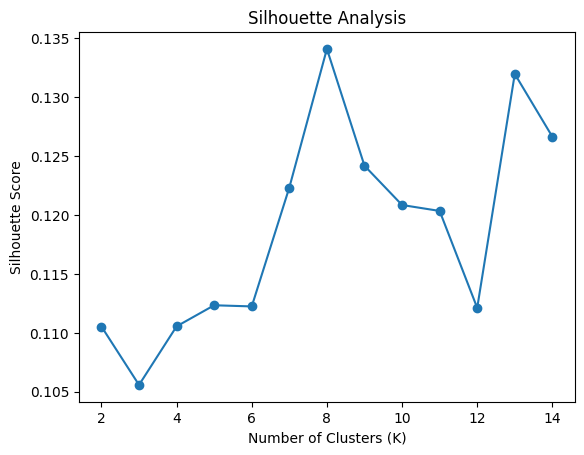

In [ ]:
def silhouette_score(X, labels):
    unique_labels = np.unique(labels)
    silhouette_scores = []
    for i in range(len(X)):
        own_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == j] for j in unique_labels if j != labels[i]]
        if len(own_cluster) > 1:
            a = np.mean([euclidean_distance(X[i], p) for p in own_cluster if not np.array_equal(X[i], p)])
        else:
            a = 0
        b = min([
            np.mean([euclidean_distance(X[i], p) for p in cluster]) 
            for cluster in other_clusters if len(cluster) > 0
        ])
        
        silhouette_scores.append((b - a) / max(a, b))
    
    return np.mean(silhouette_scores)

sil_scores = []
for k in range(2, k_value):
    labels, _ = kmeans(X, k) 
    sil_scores.append(silhouette_score(X, labels))
plt.plot(range(2, k_value), sil_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

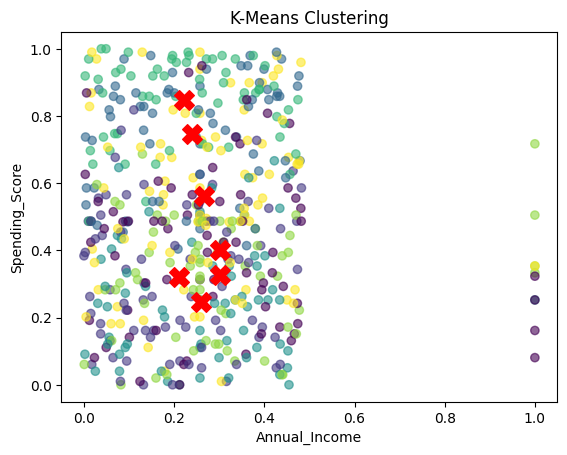

In [42]:
optimal_k = int(input("Enter the optimal K value"))
labels, centroids = kmeans(X, optimal_k)
df['Cluster'] = labels

# Visualize Clusters (Using first two numerical features)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.title('K-Means Clustering')
plt.show()


In [43]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         Annual_Income  Spending_Score  Website_Visits  \
Cluster                                                  
0             0.300615        0.401824        0.227175   
1             0.211012        0.320715        0.818221   
2             0.240237        0.747714        0.455167   
3             0.260296        0.247169        0.387978   
4             0.222400        0.847378        0.682288   
5             0.302471        0.327510        0.540025   
6             0.265217        0.562055        0.466004   

         Product_Categories_Purchased  Total_Purchase_Amount  \
Cluster                                                        
0                            0.188439               0.293649   
1                            0.452518               0.263614   
2                            0.805269               0.242713   
3                            0.766392               0.258885   
4                            0.248789               0.235194   
5                            

In [45]:
def compute_z_scores(data):
    mean = np.mean(data, axis=0)  
    std_dev = np.std(data, axis=0)  
    return np.abs((data - mean) / std_dev)  
z_scores = compute_z_scores(df[numerical_cols].values)
df_cleaned = df[(z_scores < 3).all(axis=1)]
print("Original dataset shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)

Original dataset shape: (500, 9)
After outlier removal: (490, 9)


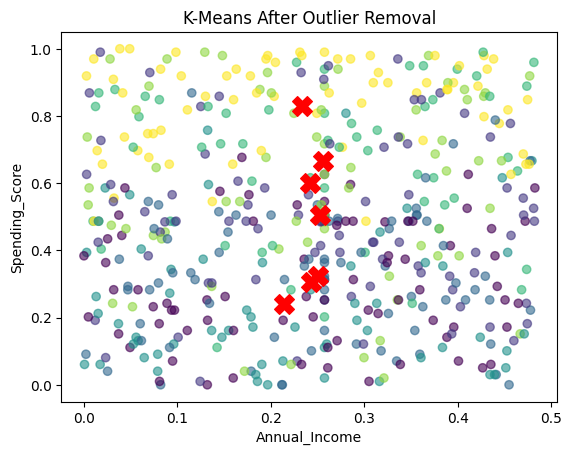

In [46]:
X_clean = df_cleaned[numerical_cols].values
labels_clean, centroids_clean = kmeans(X_clean, optimal_k)

plt.scatter(X_clean[:, 0], X_clean[:, 1], c=labels_clean, cmap='viridis', alpha=0.6)
plt.scatter(centroids_clean[:, 0], centroids_clean[:, 1], marker='X', s=200, color='red')
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.title('K-Means After Outlier Removal')
plt.show()


   Point Index         X         Y  Cluster   Type
0            0  1.000000  0.252525     -1.0  Noise
1            1  0.242197  0.616162     -1.0  Noise
2            2  0.440923  0.030303     -1.0  Noise
3            3  0.257247  0.888889     -1.0  Noise
4            4  0.391912  0.414141     -1.0  Noise
5            5  0.009732  0.486903     -1.0  Noise
6            6  0.395575  0.171717     -1.0  Noise
7            7  0.300681  0.393939      0.0   Core
8            8  1.000000  0.717172     -1.0  Noise
9            9  0.325707  0.383838      1.0   Core


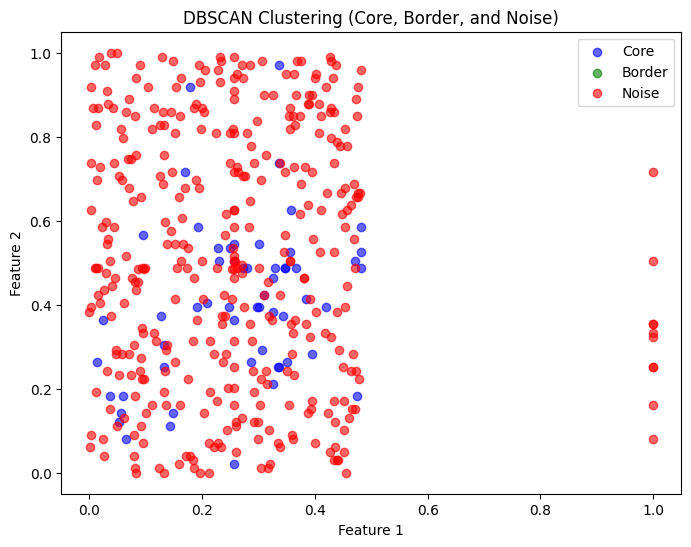

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def dbscan(X, eps=0.4, min_samples=5):
    labels = -np.ones(len(X))  # -1 means noise by default
    point_types = np.full(len(X), "Noise")  # Store core/border/noise status
    cluster_id = 0
    
    for i in range(len(X)):
        if labels[i] != -1:
            continue
        
        # Find neighbors
        distances = np.linalg.norm(X - X[i], axis=1)
        neighbors = np.where(distances < eps)[0]
        
        if len(neighbors) < min_samples:
            labels[i] = -1  # Still noise
            continue
        
        # Mark as core point
        point_types[i] = "Core"
        labels[i] = cluster_id
        
        # Expand cluster
        for j in neighbors:
            if labels[j] == -1:  # If noise, make it part of cluster
                labels[j] = cluster_id
                point_types[j] = "Border" if len(np.where(np.linalg.norm(X - X[j], axis=1) < eps)[0]) < min_samples else "Core"

        cluster_id += 1
    
    return labels, point_types

# Run DBSCAN
labels_dbscan, point_types = dbscan(X)

# Create a table showing point classification
df_results = pd.DataFrame({
    "Point Index": np.arange(len(X)),
    "X": X[:, 0],
    "Y": X[:, 1],
    "Cluster": labels_dbscan,
    "Type": point_types
})

print(df_results.head(10))  # Show first 10 rows

# Visualize DBSCAN Clustering with Core, Border, and Noise Points
plt.figure(figsize=(8,6))
for t, color in zip(["Core", "Border", "Noise"], ["blue", "green", "red"]):
    subset = X[point_types == t]
    plt.scatter(subset[:, 0], subset[:, 1], c=color, label=t, alpha=0.6)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering (Core, Border, and Noise)")
plt.legend()
plt.show()


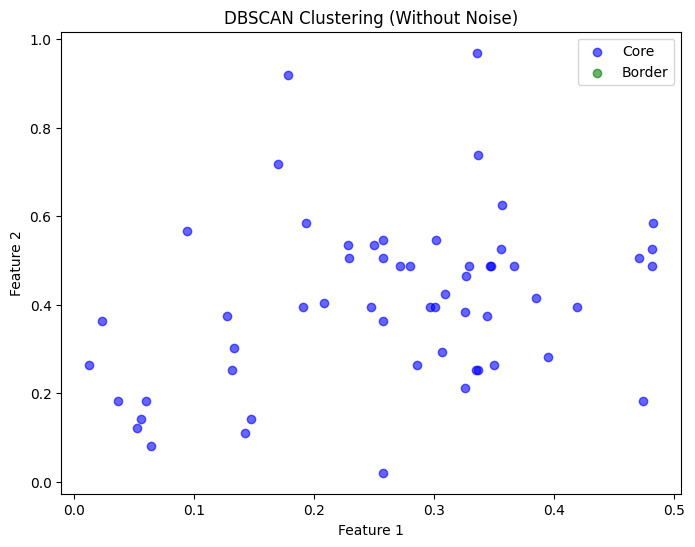

In [ ]:
mask = point_types != "Noise"
X_filtered = X_clean[mask]
point_types_filtered = point_types[mask]

plt.figure(figsize=(8,6))
for t, color in zip(["Core", "Border"], ["blue", "green"]):
    subset = X_filtered[point_types_filtered == t]
    plt.scatter(subset[:, 0], subset[:, 1], c=color, label=t, alpha=0.6)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering (Without Noise)")
plt.legend()
plt.show()

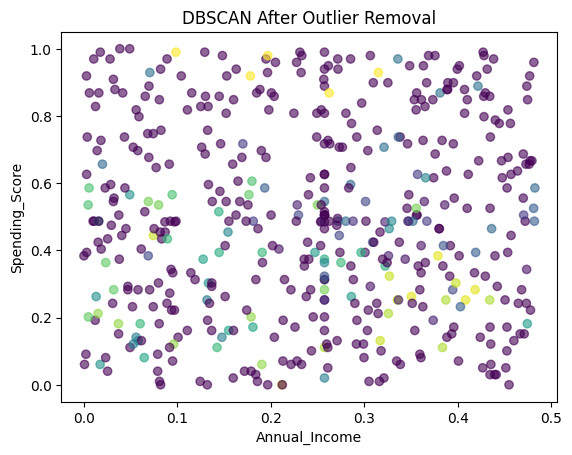

In [48]:
X_clean = df_cleaned[numerical_cols].values
labels_dbscan, point_types = dbscan(X_clean)

plt.scatter(X_clean[:, 0], X_clean[:, 1], c=labels_dbscan, cmap='viridis', alpha=0.6)
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.title('DBSCAN After Outlier Removal')
plt.show()

In [52]:
print(f"K-Means Clusters: {np.unique(labels)}")
print(f"DBSCAN Clusters: {np.unique(labels_dbscan)}")


K-Means Clusters: [0 1 2 3 4 5 6]
DBSCAN Clusters: [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23.]
